<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml20_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN(Recurrent Nueral Network, 순환 신경망)

시계열 데이터, 자연어 처리 등에서 좋은 성능을 주는 신경망.

# Imports

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split

# IMDB 데이터셋

* imdb 사이트 사용자들의 영화 리뷰를 긍정(1), 부정(0)으로 분류한 데이터.
* 25,000개 훈련 샘플과 25,000개 테스트 샘플.
* 샘플마다 토큰(단어)의 개수가 다름 - 샘플마다 특성(feature)의 개수가 다름. -> 전처리

In [52]:
(x_train_full, y_train_full), (x_test, y_test) = \
    keras.datasets.imdb.load_data(num_words=200)
# num_words : 가장 자주 등장하는 단어 n개를 어휘 사전으로 사용.

In [53]:
x_train_full.shape

(25000,)

In [54]:
x_test.shape

(25000,)

In [55]:
y_train_full.shape

(25000,)

In [56]:
np.unique(y_train_full, return_counts=True)
#> 훈련 셋에는 긍정/부정 리뷰가 각각 12,500개씩 포함

(array([0, 1]), array([12500, 12500]))

In [57]:
y_test.shape

(25000,)

In [58]:
np.unique(y_test, return_counts=True)
#> 테스트 셋에서도 긍정/부정 리뷰가 각각 12,500개씩 포함.

(array([0, 1]), array([12500, 12500]))

## 훈련 셋 탐색

In [59]:
print(x_train_full[0])
#> 훈련 셋의 첫번째 샘플은 정수들을 원소로 갖는 파이썬 리스트.

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [60]:
print(type(x_train_full[0]))

<class 'list'>


In [61]:
print(len(x_train_full[0]))

218


훈련 셋의 첫번째 샘플은 정수 218개를 갖는 리스트(list).

In [62]:
print(x_train_full[1])

[1, 194, 2, 194, 2, 78, 2, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 2, 20, 13, 119, 2, 189, 102, 5, 2, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 2, 126, 93, 4, 114, 9, 2, 2, 5, 2, 4, 116, 9, 35, 2, 4, 2, 9, 2, 2, 4, 118, 9, 4, 130, 2, 19, 4, 2, 5, 89, 29, 2, 46, 37, 4, 2, 9, 45, 43, 38, 2, 2, 2, 4, 2, 26, 2, 5, 163, 11, 2, 2, 4, 2, 9, 194, 2, 7, 2, 2, 2, 2, 148, 2, 2, 2, 15, 123, 125, 68, 2, 2, 15, 2, 165, 2, 98, 5, 4, 2, 9, 43, 2, 2, 15, 2, 120, 5, 120, 174, 11, 2, 175, 136, 50, 9, 2, 2, 2, 5, 2, 2, 2, 2, 5, 4, 2, 131, 152, 2, 18, 2, 32, 2, 2, 14, 9, 6, 2, 78, 22, 2, 64, 2, 9, 8, 168, 145, 23, 4, 2, 15, 16, 4, 2, 5, 28, 6, 52, 154, 2, 33, 89, 78, 2, 16, 145, 95]


In [63]:
print(type(x_train_full[1]))

<class 'list'>


In [64]:
print(len(x_train_full[1]))

189


훈련 셋의 두번째 샘플은 정수 189개를 갖는 리스트(list).

imdb 데이터 셋의 훈련 셋은 파이썬의 *리스트(list) 객체*를 원소로 갖는 **1차원 np.ndarray** 타입. 각각의 리스트들은 서로 다른 개수의 정수들을 포함하고 있음.

In [65]:
for i in range(5):
    print(f'인덱스-{i} 샘플의 토큰(단어) 개수 : {len(x_train_full[i])}')

인덱스-0 샘플의 토큰(단어) 개수 : 218
인덱스-1 샘플의 토큰(단어) 개수 : 189
인덱스-2 샘플의 토큰(단어) 개수 : 141
인덱스-3 샘플의 토큰(단어) 개수 : 550
인덱스-4 샘플의 토큰(단어) 개수 : 147


In [80]:
# 훈련 셋에서 첫5개 샘플에서 나오는 첫 20개의 인코딩 숫자들.
for i in range(5):
    print(x_train_full[i][:20])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25]
[1, 194, 2, 194, 2, 78, 2, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14]
[1, 14, 47, 8, 30, 31, 7, 4, 2, 108, 7, 4, 2, 54, 61, 2, 13, 71, 149, 14]
[1, 4, 2, 2, 33, 2, 4, 2, 2, 111, 153, 103, 4, 2, 13, 70, 131, 67, 11, 61]
[1, 2, 2, 7, 61, 113, 10, 10, 13, 2, 14, 20, 56, 33, 2, 18, 2, 88, 13, 2]


각각의 영화 리뷰의 길이(사용된 단어 개수)가 다르다. 1차원 리스트의 원소들은 영어 단어에 매칭된 숫자들.

In [66]:
# word_index : 단어(word)를 키로 갖고, 그 단어의 인덱스(빈도수 순위)를 값으로 갖는 dict.
# 영화 리뷰의 단어들을 숫자로 인코딩할 때 사용하기 위해서 만들어진 dict.
# 숫자 인덱스는 데이터셋에 등장하는 빈도수에 따라서 결정.
word_index = keras.datasets.imdb.get_word_index()

In [67]:
print(type(word_index)) #> 단어(word)를 키로 갖고, 그 단어의 인덱스를 값으로 갖는 dict.

<class 'dict'>


In [81]:
len(word_index) #> 88,584개 단어와 그 인덱스를 저장.

88584

In [69]:
for i, (k, v) in enumerate(word_index.items()):
    print(k, v)
    if i == 5:
        break

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951
woods 1408


인덱스를 단어로 디코딩하기 위해서는 단어의 인덱스를 키로 하고 단어를 값으로 갖는 dict가 있었으면...

In [70]:
index_word = {v: k for k, v in word_index.items()}

In [71]:
for i, (k, v) in enumerate(index_word.items()):
    print(k, v)
    if i == 5:
        break

34701 fawn
52006 tsukino
52007 nunnery
16816 sonja
63951 vani
1408 woods


In [72]:
for i in range(1, 6):
    print(index_word.get(i))

the
and
a
of
to


각 단어의 인덱스들은 단어의 빈도수 순위를 의미. 인덱스 0은 패딩(padding)을 위한 숫자.

영화 리뷰 샘플의 숫자들의 의미:
*   0: 패딩(padding)
*   1: 문장의 시작.
*   2: load_data() 함수의 아규먼트 num_words에 포함되지 않은 단어들.
*   3: word_index (또는 index_word)의 인덱스.

In [73]:
def decode_review(review):
    # review : 숫자들의 리스트
    return ' '.join([index_word.get(i-3, '?') for i in review])

In [82]:
decode_review(x_train_full[0])

"? this film was just ? ? ? ? story ? ? really ? the part they ? and you could just ? being there ? ? is an ? ? and now the same being director ? ? ? from the same ? ? as ? so i ? the fact there was a real ? with this film the ? ? ? the film were great it was just ? so much that i ? the film as ? as it was ? for ? and would ? it to ? to watch and the ? ? was ? really ? at the end it was so ? and you know what they say if you ? at a film it ? have been good and this ? was also ? to the two little ? that ? the ? of ? and ? they were just ? ? are ? ? out of the ? ? i think because the ? that ? them all ? up are such a big ? for the ? film but these ? are ? and should be ? for what they have ? don't you think the ? story was so ? because it was ? and was ? life after all that was ? with us all"

In [83]:
decode_review(x_train_full[1])

"? big ? big ? bad ? and a ? ? ? these are the ? to best ? this ? movie i love ? horror movies and ? seen ? but this had got to be on of the ? ever made the plot is ? ? and ? the acting is an ? the ? is ? ? the best is the end ? with the ? and how he ? out who the ? is it's just so ? ? ? the ? are ? and funny in ? ? the ? is big ? of ? ? ? ? those ? ? ? that show off their ? ? that ? actually ? them and the ? is just ? ? that ? over and over again in ? every scene there is ? ? ? and ? ? ? ? and the ? still doesn't ? for ? all ? ? this is a ? bad film ? only ? is to look back on the ? that was the ? and have a good old ? at how bad ? was back then"

### 각 샘플의 길이 분포

각각의 영화 리뷰의 길이(포함된 단어 개수) 분포

In [89]:
review_lengths = pd.Series([len(x) for x in x_train_full])

In [93]:
review_lengths.describe()   # 기술 통계량

,0
count,25000.000000
mean,238.713640
std,176.497204
min,11.000000
25%,130.000000
50%,178.000000
75%,291.000000
max,2494.000000


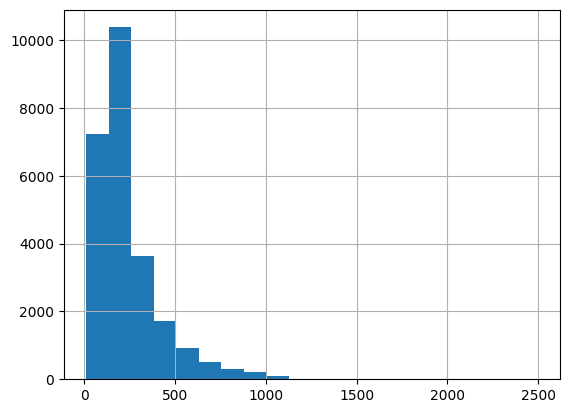

In [96]:
review_lengths.hist(bins=20)   # 히스토그램
plt.show()

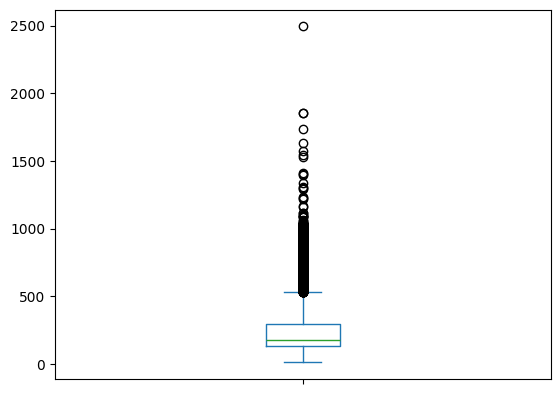

In [99]:
review_lengths.plot.box()   #> outlier가 많은 분포.
plt.show()

 대부분의 리뷰에 사용된 단어의 개수는 300개 미만. 평균(238개)이 중앙값(178개)보다 많이 큰 이유는 사용된 단어의 개수가 매우 많은 리뷰들이 간혹 있기 때문에.

 신경망을 훈련시키기 위해서는 모든 샘플들의 길이가 같아야 함.

 샘플(영화 리뷰)마다 100개의 단어(토큰)만 사용. 길이가 100 이상인 샘플들은 잘라내고, 길이가 100 미만인 샘플들은 0으로 패딩을 추가.

## Data wrangling

(25,000, ) shape의 훈련/테스트 셋을 (25_000, 100) shape으로 변환.

`keras.preprocessing.sequence.pad_sequence()` 함수의 파라미터 :
* sequences : 변환할 데이터
* maxlen : 각 샘플의 최대 길이.
* padding : 샘플의 길이가 maxlen보다 짧을 때 패딩을 넣을 위치. 기본값은 'pre'. 기본값은 패딩(0)을 시퀀스의 앞쪽에 채움.
* truncating : 샘플의 길이가 maxlen보다 길 때 샘플을 자르는 위치. 기본값은 'pre', 기본값은 시퀀스의 앞쪽을 자름.
* 순환신경망을 사용할 때 padding과 truncating은 모두 'pre' 방식을 선호.

In [100]:
x_train_full_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_train_full,
                                                              maxlen=100)

In [102]:
x_train_full_seq.shape  #> (n_samples, n_tokens)

(25000, 100)

In [103]:
x_test_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_test,
                                                        maxlen=100)

In [104]:
x_test_seq.shape

(25000, 100)